In [74]:
import os 
import numpy as np
import cv2
np.set_printoptions(suppress=True)


def show(img):
    cv2.imshow('img image',img.astype(np.uint8))
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    
def show_sequence(sequence):
    for i in range(len(sequence)):
        show(sequence[i])
    
    
data_dir = '/home/dato/src/my_projects/robotics/inverse_kinematics_xarm/saved_data/2023-11-28'
filenames = set([x.replace('actions_', '').replace('frames_', '').replace('.npy', '').replace('states_', '') for x in os.listdir(data_dir)])

filenames

{'1701207234580959'}

In [80]:
for filename in filenames:
    action_loaded = np.load(os.path.join(data_dir, 'actions_' + filename + '.npy'))
    frames_loaded = np.load(os.path.join(data_dir, 'frames_' + filename + '.npy'))
    states_loaded = np.load(os.path.join(data_dir, 'states_' + filename + '.npy'))
    break

In [81]:
states_loaded

array([[-0.10132686,  0.04980654,  0.22125744],
       [-0.10116337,  0.04971912,  0.22863374],
       [-0.1074604 ,  0.05399694,  0.22594477],
       [-0.10881602,  0.05708371,  0.22382289],
       [-0.11136005,  0.05967541,  0.21584988],
       [-0.11565324,  0.06265411,  0.19391469],
       [-0.11779037,  0.06583572,  0.1817834 ],
       [-0.12098391,  0.06904517,  0.15251592],
       [-0.12027739,  0.07007619,  0.11546475],
       [-0.12467836,  0.07414435,  0.07613232],
       [-0.12643849,  0.0759772 ,  0.03555081],
       [-0.12686464,  0.05777265,  0.09203124],
       [-0.12862381,  0.03499196,  0.13384704],
       [-0.13065055,  0.01248617,  0.15948813],
       [-0.1314615 , -0.01104097,  0.18635941],
       [-0.13072102, -0.0339347 ,  0.19422461],
       [-0.13197233, -0.05750986,  0.18528969],
       [-0.12984273, -0.07891007,  0.16889257],
       [-0.12932423, -0.10113654,  0.1373097 ],
       [-0.12829371, -0.1239429 ,  0.08510312],
       [-0.13025684, -0.14722718,  0.036

In [76]:
print(frames_loaded.shape)
print(action_loaded.shape)

(35, 240, 320, 3)
(35, 4)


In [77]:
action_loaded

array([[-0.00001552,  0.00078083,  0.0110363 ,  1.        ],
       [-0.00336319,  0.00413632,  0.00356209,  1.        ],
       [-0.00025034,  0.00312657,  0.00083613,  1.        ],
       [-0.0020789 ,  0.00330787, -0.00777393,  1.        ],
       [-0.00271905,  0.00398424, -0.01584988,  1.        ],
       [-0.00161003,  0.00427361, -0.01528066,  1.        ],
       [-0.00265709,  0.00436007, -0.02983236,  1.        ],
       [-0.00264773,  0.00441869, -0.03256488,  1.        ],
       [-0.00653843,  0.00665574, -0.03283072,  1.        ],
       [-0.00532164,  0.00585565, -0.03613232, -1.        ],
       [-0.00356151, -0.0189772 ,  0.06204919, -1.        ],
       [-0.00313536, -0.02377265,  0.05036876, -1.        ],
       [-0.00137619, -0.02399196,  0.04055296, -1.        ],
       [ 0.00065055, -0.02448617,  0.03411187, -1.        ],
       [ 0.0014615 , -0.02395903,  0.01364059, -1.        ],
       [ 0.00072102, -0.0240653 , -0.00062461, -1.        ],
       [ 0.00197233, -0.

In [79]:
for i in range(action_loaded.shape[0]):
    print(action_loaded[i])
    show(frames_loaded[i])

[-0.00001552  0.00078083  0.0110363   1.        ]
[-0.00336319  0.00413632  0.00356209  1.        ]
[-0.00025034  0.00312657  0.00083613  1.        ]
[-0.0020789   0.00330787 -0.00777393  1.        ]
[-0.00271905  0.00398424 -0.01584988  1.        ]
[-0.00161003  0.00427361 -0.01528066  1.        ]
[-0.00265709  0.00436007 -0.02983236  1.        ]
[-0.00264773  0.00441869 -0.03256488  1.        ]
[-0.00653843  0.00665574 -0.03283072  1.        ]
[-0.00532164  0.00585565 -0.03613232 -1.        ]
[-0.00356151 -0.0189772   0.06204919 -1.        ]
[-0.00313536 -0.02377265  0.05036876 -1.        ]
[-0.00137619 -0.02399196  0.04055296 -1.        ]
[ 0.00065055 -0.02448617  0.03411187 -1.        ]
[ 0.0014615  -0.02395903  0.01364059 -1.        ]
[ 0.00072102 -0.0240653  -0.00062461 -1.        ]
[ 0.00197233 -0.02349014 -0.01088969 -1.        ]
[-0.00015727 -0.02508993 -0.02649257 -1.        ]
[-0.00067577 -0.02586346 -0.0397097  -1.        ]
[-0.00170629 -0.0260571  -0.04510312  1.        ]


In [4]:
3096

3096

In [5]:
3102

3102

In [ ]:
relocate-v0: 3102
xarm: 3072
    

In [7]:
t=0.2

for x in np.arange(0, 1+t, t):
    print(x)

0.0
0.2
0.4
0.6000000000000001
0.8
1.0


In [9]:
t=0.2

for x in np.arange(0, 1, t):
    print(x)

0.0
0.2
0.4
0.6000000000000001
0.8


In [53]:
import math

class ParabolicController:
    def __init__(self, current_location, p1, p2, h=0.2, t=0.1):
        # 1 ღიაა
        # -1 დახურულია

        self.current_location = current_location
        self.p1 = p1
        self.p2 = p2
        assert p1[-1]==p2[-1]
        self.Z_coordinate = p1[-1]
        self.h = h
        self.t = t
        self.sequence, self.gripper = self.get_sequence()
        print(self.sequence)
        self.chasing_idx = 0
        self.gripper_open = 1

    def get_sequence(self):
        stop_height = 0.1
        sequence = []
        gripper = []
        for x in np.arange(0, 1, self.t):
            sequence.append(self.cl_pt(self.current_location, self.p1, x))
            gripper.append(1)
            if x + self.t * 1.5 >= 1:
                break
        
        for x in np.arange(0, 1+self.t, self.t):
            sequence.append(self.cl_pt(self.p1, self.p2, x))
            if x >= 1:
                gripper.append(1)
            else:
                gripper.append(-1)

        root = (1 + math.sqrt(1-stop_height/self.h)) / 2
        for x in np.arange(self.t, 1+self.t, self.t):
            sequence.append(self.cl_pt(self.p2, self.p1, x))
            gripper.append(1)
            if x >= root:
                break
        return sequence, gripper
    

    def cl_pt(self, p1, p2, t):
        x_t = p1[0] + (p2[0]-p1[0])*t
        y_t = p1[1] + (p2[1]-p1[1])*t
        # z_t = 4*self.h*t*(1-t) + self.Z_coordinate 
        z1 = p1[-1]
        z2 = p2[-1]

        z_t = (-4 * self.h + 2 * z1 + 2 * z2)*t*t + (4 * self.h - 3 * z1 - z2)*t +z1
        return [x_t, y_t, z_t]

    def act(self, current_location):
        self.chasing_idx+=1
        if len(self.sequence) <= self.chasing_idx:
            return False, False
        act = np.array(self.sequence[self.chasing_idx]) - np.array(current_location)
        gripper = self.gripper[self.chasing_idx]
        return (list(act), gripper)
    
loc = [-0.2154, -0.0028, 0.0701]
controller = ParabolicController(loc, [-0.13, 0.08, 0.06], [-0.13, -0.15, 0.06]) 





[[-0.2154, -0.0028, 0.0701], [-0.20686000000000002, 0.0054800000000000005, 0.117672], [-0.19832, 0.013760000000000001, 0.15444800000000003], [-0.18978, 0.022040000000000004, 0.18042800000000003], [-0.18124, 0.030320000000000003, 0.195612], [-0.17270000000000002, 0.0386, 0.2], [-0.16416, 0.04688000000000001, 0.19359200000000004], [-0.15562, 0.05516000000000001, 0.176388], [-0.14708, 0.06344000000000001, 0.14838800000000002], [-0.13854, 0.07172, 0.10959199999999997], [-0.13, 0.08, 0.06], [-0.13, 0.057, 0.1104], [-0.13, 0.034, 0.1496], [-0.13, 0.010999999999999996, 0.1776], [-0.13, -0.011999999999999997, 0.19440000000000002], [-0.13, -0.03499999999999999, 0.2], [-0.13, -0.05800000000000001, 0.1944], [-0.13, -0.081, 0.17759999999999998], [-0.13, -0.104, 0.1496], [-0.13, -0.127, 0.1104], [-0.13, -0.14999999999999997, 0.06], [-0.13, -0.127, 0.1104], [-0.13, -0.104, 0.1496], [-0.13, -0.08099999999999999, 0.1776], [-0.13, -0.057999999999999996, 0.19440000000000002], [-0.13, -0.035, 0.2], [-0.1

In [54]:
len(controller.sequence)

30

In [57]:
sequence = []
gripper = []


# for x in np.arange(0, 1, controller.t):
#     sequence.append(controller.cl_pt(controller.current_location, controller.p1, x))
#     if x + controller.t * 1.5 >= 1:
#         break
#     gripper.append(1)

# print(sequence)
# print(gripper)
# print('=============')

sequence = []
for x in np.arange(0, 1+controller.t, controller.t):
    print(controller.cl_pt(controller.p1, controller.p2, x), x)
    sequence.append(controller.cl_pt(controller.p1, controller.p2, x))
    if x >= 1:
        gripper.append(1)
    else:
        gripper.append(-1)
    
    
print(gripper)
    

[-0.13, 0.08, 0.06] 0.0
[-0.13, 0.057, 0.1104] 0.1
[-0.13, 0.034, 0.1496] 0.2
[-0.13, 0.010999999999999996, 0.1776] 0.30000000000000004
[-0.13, -0.011999999999999997, 0.19440000000000002] 0.4
[-0.13, -0.03499999999999999, 0.2] 0.5
[-0.13, -0.05800000000000001, 0.1944] 0.6000000000000001
[-0.13, -0.081, 0.17759999999999998] 0.7000000000000001
[-0.13, -0.104, 0.1496] 0.8
[-0.13, -0.127, 0.1104] 0.9
[-0.13, -0.14999999999999997, 0.06] 1.0
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1]


In [37]:
controller.p1

[-0.13, 0.08, 0.06]

In [38]:
controller.p2

[-0.13, -0.15, 0.06]

In [44]:
def cl_pt(p1, p2, t):
    x_t = p1[0] + (p2[0]-p1[0])*t
    y_t = p1[1] + (p2[1]-p1[1])*t
    z_t = 4*controller.h*t*(1-t)
    print(z_t)
    return [x_t, y_t, z_t]

cl_pt(controller.p1, controller.p2, 0)

0.0


[-0.13, 0.08, 0.0]

In [51]:
a = [1, 2, 3, 4, 5, 6, 7, 8]
len(a)

8

In [52]:
a[7]

8

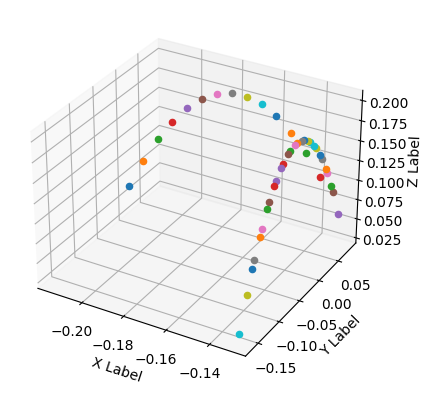

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for point in controller.sequence:
    ax.scatter(point[0], point[1], point[2])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
